In [2]:
import pprint
import json
import pandas as pd
import pyshex


In [38]:
f = open("disease_shex.json")
shex_results = json.load(f)
len(shex_results.keys())


5659

In [39]:
counts = dict()
for qid in shex_results.keys():
    for row in shex_results[qid]:
        row["reason"] = row["reason"].replace("triples", "statements")
        row["reason"] = row["reason"].replace("max {1,1}", "cardinality constraint")
        row["reason"] = row["reason"].replace("No matching statements found for predicate prov:wasDerivedFrom", "missing reference")
        if row["property"].replace("http://www.wikidata.org/prop/", "") not in counts.keys():
            counts[row["property"].replace("http://www.wikidata.org/prop/", "")] = dict()
        if row["reason"] not in  counts[row["property"].replace("http://www.wikidata.org/prop/", "")].keys():
             counts[row["property"].replace("http://www.wikidata.org/prop/", "")][row["reason"]] = 0
        counts[row["property"].replace("http://www.wikidata.org/prop/", "")][row["reason"]] += 1    

In [40]:
pd.DataFrame(counts)

,P4229,P699,P780,P1748,P1550,P492,P2888,P5806
2 statements exceeds cardinality constraint,2816.0,1388.0,NaN,520.0,8.0,110.0,NaN,NaN
missing reference,35.0,3.0,342.0,374.0,562.0,39.0,NaN,20.0
3 statements exceeds cardinality constraint,12.0,20.0,NaN,2.0,NaN,1.0,NaN,NaN
No matching statements found for predicate pr:P248,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"{""values"": [""http://www.wikidata.org/entity/Q27468140"", ""htt...",1.0,NaN,NaN,828.0,NaN,NaN,NaN,NaN
4 statements exceeds cardinality constraint,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN
No matching statements found for predicate pr:P5270,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
No matching statements found for predicate p:P2888,NaN,NaN,NaN,NaN,NaN,NaN,68.0,NaN


In [41]:
for qid in shex_results.keys():
    for row in shex_results[qid]:
        if "values" in row["reason"]:
            print(row)

{'property': 'http://www.wikidata.org/prop/P1748', 'reason': '{"values": ["http://www.wikidata.org/entity/Q27468140", "htt...', 'verbose_reason': '  Testing wd:Q863857 against shape #gene-wiki-disease-item\n    Testing s:Q863857-5101ADEC-7FB3-4279-9948-F433F5920979 against shape #P1748_nci_theraurus_id\n      Testing ref:ed7e2ad3345f7264f1834f0c3a48d0f18fbc1db8 against shape #disease-ontology-reference\n           No matching triples found for predicate pr:P699\n  Testing wd:Q863857 against shape #gene-wiki-disease-item\n    Testing s:Q863857-5101ADEC-7FB3-4279-9948-F433F5920979 against shape #P1748_nci_theraurus_id\n      Testing ref:ed7e2ad3345f7264f1834f0c3a48d0f18fbc1db8 against shape #mondo-disease-reference\n        Node: wd:Q5282129 not in value set:\n\t {"values": ["http://www.wikidata.org/entity/Q27468140", "htt...'}
{'property': 'http://www.wikidata.org/prop/P1748', 'reason': '{"values": ["http://www.wikidata.org/entity/Q27468140", "htt...', 'verbose_reason': '  Testing wd:Q9

<AxesSubplot:>

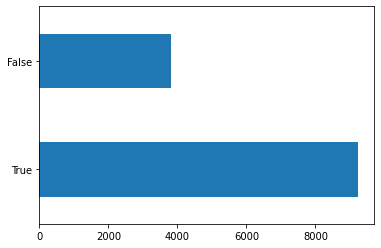

In [7]:
df["result"].value_counts().plot(kind='barh')

In [8]:
r2 = []
for index, row in df[df["result"]==False].iterrows():
    r = row["reason"].split("\n  Testing")
    for c in r:
        r2.append(c.split("\n"))
df2 = pd.DataFrame(r2).drop_duplicates()



In [33]:
shex_results

{'Q730877': [{'property': 'http://www.wikidata.org/prop/P4229',
   'reason': '2 statements cardinality constraint',
   'verbose_reason': '  Testing wd:Q730877 against shape #gene-wiki-disease-item\n    Testing s:Q730877-A5B6D89D-6BFA-4821-9671-D5CD6007C090 against shape #P4229_icd10-cm\n      Triples:\n      s:Q730877-A5B6D89D-6BFA-4821-9671-D5CD6007C090 prov:wasDerivedFrom ref:85eba6d3378d5abd30f679c78b9a2838a9e318c0 .\n      s:Q730877-A5B6D89D-6BFA-4821-9671-D5CD6007C090 prov:wasDerivedFrom ref:f1edc53282004e1b2cab4400fe1d309407a4c528 .\n   2 triples exceeds max {1,1}'}],
 'Q744790': [{'property': 'http://www.wikidata.org/prop/P4229',
   'reason': '2 statements cardinality constraint',
   'verbose_reason': '  Testing wd:Q744790 against shape #gene-wiki-disease-item\n    Testing s:Q744790-1610AEF3-EB64-4016-A420-BB4F1174CFAD against shape #P4229_icd10-cm\n      Triples:\n      s:Q744790-1610AEF3-EB64-4016-A420-BB4F1174CFAD prov:wasDerivedFrom ref:231ac5f7f26cd3f38baa8e5681d2596bd84acd

In [10]:
errors = dict()
for index, row in df2.iterrows():
    if row[0].startswith("  Testing"):
        qid = row[0].replace(" against shape #gene-wiki-disease-item", "").replace("  Testing wd:", "")
        if qid not in errors.keys():
            errors[qid] = []
    for i in range(len(row)-1):
        if i != len(row)-1:
            if row[i+1] == None:
                if row[i].strip() not in errors[qid]:
                    errors[qid].append(row[i].strip())
                break
print(len(lengte))      

NameError: name 'lengte' is not defined

In [11]:
counts = dict()
for qid in errors.keys():
    for error in errors[qid]:
        if error not in counts.keys():
            counts[error] = 0
        counts[error]+=1
counts

{'No matching triples found for predicate p:P2888': 3733,
 '{"values": ["http://www.wikidata.org/entity/Q12136"], "type"...': 3339,
 'No matching triples found for predicate prov:wasDerivedFrom': 1569,
 '2 triples exceeds max {1,1}': 1903,
 '{"values": ["http://www.wikidata.org/entity/Q5282129"], "typ...': 3,
 '{"values": ["http://www.wikidata.org/entity/Q27468140", "htt...': 787,
 'No matching triples found for predicate pr:P699': 786,
 '3 triples exceeds max {1,1}': 9,
 'No matching triples found for predicate pr:P248': 1,
 'No matching triples found for predicate pr:P5270': 1}

In [174]:
pprint.pprint(shex_results[0]["reason"])

('  Testing wd:Q12135 against shape #gene-wiki-disease-item\n'
 '    Testing s:Q12135-09ad8697-4e33-3086-adc0-d05ca1725b18 against shape '
 '#P279_subclassof\n'
 '      Testing wd:Q12136 against shape #gene-wiki-disease-item\n'
 '           No matching triples found for predicate p:P2888\n'
 '  Testing wd:Q12135 against shape #gene-wiki-disease-item\n'
 '    Testing s:Q12135-09ad8697-4e33-3086-adc0-d05ca1725b18 against shape '
 '#P279_subclassof\n'
 '      Testing wd:Q12136 against shape #gene-wiki-disease-item\n'
 '           No matching triples found for predicate p:P2888\n'
 '  Testing wd:Q12135 against shape #gene-wiki-disease-item\n'
 '    Testing s:Q12135-09ad8697-4e33-3086-adc0-d05ca1725b18 against shape '
 '#P279_subclassof\n'
 '      Testing wd:Q12136 against shape N075a9b3ae3204a6eaff89e8a9e5e7806\n'
 '           No matching triples found for predicate ps:P279\n'
 '  Testing wd:Q12135 against shape #gene-wiki-disease-item\n'
 '    Triples:\n'
 '      wd:Q12135 p:P699 s:Q12135

In [11]:
shex_results

{'Q730877': [{'property': 'http://www.wikidata.org/prop/P4229',
   'reason': '2 triples exceeds max {1,1}',
   'verbose_reason': '  Testing wd:Q730877 against shape #gene-wiki-disease-item\n    Testing s:Q730877-A5B6D89D-6BFA-4821-9671-D5CD6007C090 against shape #P4229_icd10-cm\n      Triples:\n      s:Q730877-A5B6D89D-6BFA-4821-9671-D5CD6007C090 prov:wasDerivedFrom ref:85eba6d3378d5abd30f679c78b9a2838a9e318c0 .\n      s:Q730877-A5B6D89D-6BFA-4821-9671-D5CD6007C090 prov:wasDerivedFrom ref:f1edc53282004e1b2cab4400fe1d309407a4c528 .\n   2 triples exceeds max {1,1}'}],
 'Q744790': [{'property': 'http://www.wikidata.org/prop/P4229',
   'reason': '2 triples exceeds max {1,1}',
   'verbose_reason': '  Testing wd:Q744790 against shape #gene-wiki-disease-item\n    Testing s:Q744790-1610AEF3-EB64-4016-A420-BB4F1174CFAD against shape #P4229_icd10-cm\n      Triples:\n      s:Q744790-1610AEF3-EB64-4016-A420-BB4F1174CFAD prov:wasDerivedFrom ref:231ac5f7f26cd3f38baa8e5681d2596bd84acd11 .\n      s:Q7